<a href="https://colab.research.google.com/github/AntonioSanabria26/FisicaComputacional1/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **DATA FRAME METEOROLOGICO**

In [ ]:
#----------- LEYENDO EL URL, DONDE EL ARCHIVO ESTA EN FORMATO CSV -------------#

URL = "https://raw.githubusercontent.com/AntonioSanabria26/FisicaComputacional1/master/Actividad1/26179.csv"
df = pd.read_csv( URL )

#--------------------------- ESTRUCTURA DEL TEXTO -----------------------------#

df = df.drop(range(0,17),axis=0)
df = df.drop([8108,8109])
# ELIMINACIÓN DE LAS PRIMERAS 17 LINEAS
df = df.dropna() 
# ELIMINACION DE LAS FILAS CON N/A
df = df.replace(to_replace= "Nulo" ,value = "N/A",regex= True )
# REMPLAZANDO LOS "Nulo" , por N/A

df = df["CNA-SMN-CG-GMC-SMAA-CLIMATOLOGIA"].str.split("\s+", n=5, expand=True)
#SEPARANDO LA CADENA DE TEXTO EN 5 COLUMNAS, CON SPLIT DE ESPACIO+, PARA QUE
#PUEDA TOMAR VALORES ENCIMA DE 1 ESPACIO DE LA MEMORIA

df.columns = ['Fecha', 'Precipitacion', 'Evaporacion', 'Tmax', 'Tmin']
#NOMBRE DE LAS COLUMNAS

df_columns =['Precipitacion', 'Evaporacion', 'Tmax', 'Tmin']
for i in df_columns:
  df[i] = pd.to_numeric( df[i] ,errors = "coerce")
#CONVIRTIENDO LAS COLUMNAS df_columns A FLOTANTES

df["Fecha"] = pd.to_datetime(df["Fecha"],dayfirst=True).copy()
df["Año"] = df["Fecha"].dt.year
df["Mes"] =df["Fecha"].dt.month
# CONVIRTIENDO LA FECHA 

df.drop('Mes', axis=1, inplace=True)
df['Mes'] = df['Fecha'].dt.strftime('%b')
# CONVIRTIENDO LOS MESES A CARACTERES

df = df.set_index("Fecha")
#CONVIRTIENDO LA FECHA COMO SERIE DE TIEMPO
df

,Precipitacion,Evaporacion,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1974-07-01,0.0,7.3,35.0,22.0,1974,Jul
1974-07-02,0.0,10.5,34.0,22.5,1974,Jul
1974-07-03,0.0,13.6,31.5,21.0,1974,Jul
1974-07-04,0.0,10.7,41.0,28.0,1974,Jul
1974-07-05,0.0,10.9,35.0,28.0,1974,Jul
...,...,...,...,...,...,...
2016-04-25,0.0,5.8,24.0,2.0,2016,Apr
2016-04-26,0.0,7.4,25.0,13.0,2016,Apr
2016-04-27,0.0,5.8,23.5,8.0,2016,Apr


In [ ]:
#ARREGLO DE AÑOS EN AÑOS
df_60 = df[(df['Año'] >= 1960) & (df['Año'] < 1980)]
df_90 = df[(df['Año'] >= 1980) & (df['Año'] < 2018)]

# **ANÁLISIS DE SERIE DE TIEMPO CON PANDAS**


 Faltan muchos datos porque entre los años 1994 y 2007 no trabajo la estación



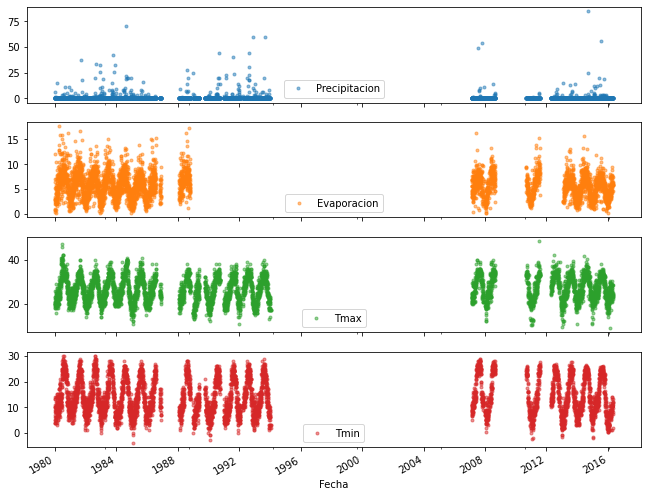

In [ ]:
#COLECCION DE DATOS DEL DATAFRAME PARA VER SI FALTAN DATOS

cols_plot = ['Precipitacion', 'Evaporacion', 'Tmax', 'Tmin']
ax_ylabels = ['Precipitacion (mm)', 'Evapaporacion (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',
                             figsize=(11, 9), subplots=True)
print("")
print( " Faltan muchos datos porque entre los años 1994 y 2007 no trabajo la estación" )
print("")

Variación ºC Tmax promedio 90-60 : -1.3093062297375013


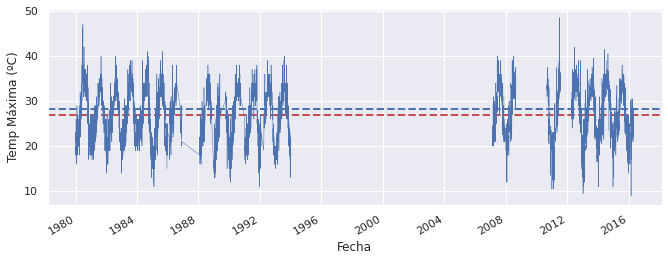

In [ ]:
# GRAFICAMOS LA TMAX DE LOS ULTIMOS 30 AÑOS

sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC Tmax promedio 90-60 :', Tmax_ave_90-Tmax_ave_60)

Variación ºC Tmin promedio 90-60 : 0.7389143889953189


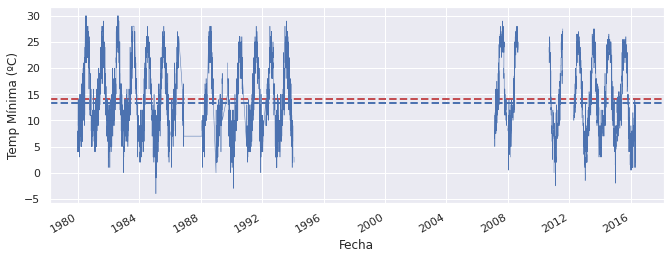

In [ ]:
# GRAFICA DE TMIN DE LOS ULTIMOS 30 AÑOS

sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()
plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC Tmin promedio 90-60 :', Tmin_ave_90-Tmin_ave_60)

Variación de precipitacion promedio 90-60 : 0.08753544995961826


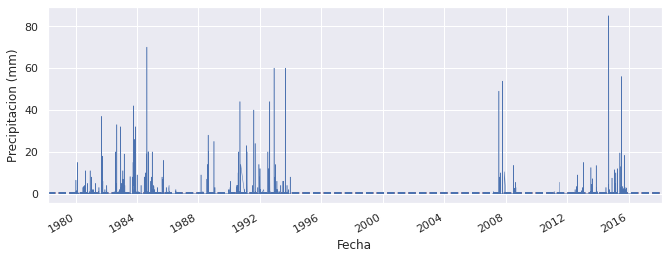

In [ ]:
# GRAFICA DE PRESIPITACION DE LOS ULTIMOS 30 AÑOS

sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_90 = df_90.Precipitacion.mean()
Precip_ave_60 = df_60.Precipitacion.mean()
plt.axhline(Precip_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Precip_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Precipitacion'].plot(linewidth=0.5);
plt.ylabel('Precipitacion (mm)');
print('Variación de precipitacion promedio 90-60 :', Precip_ave_90-Precip_ave_60)

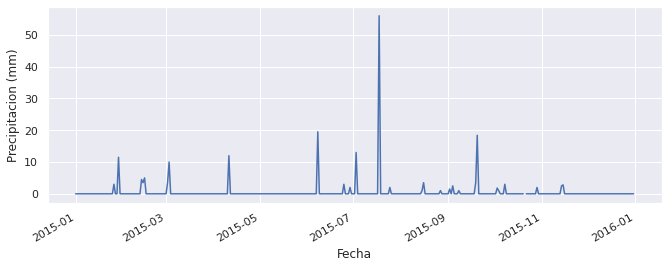

In [ ]:
# INVESTIGANDO EL AÑO MAS NUEVO CON MAS DATOS ( 2015 )
ax = df_90.loc['2015', 'Precipitacion'].plot()
ax.set_ylabel('Precipitacion (mm)');

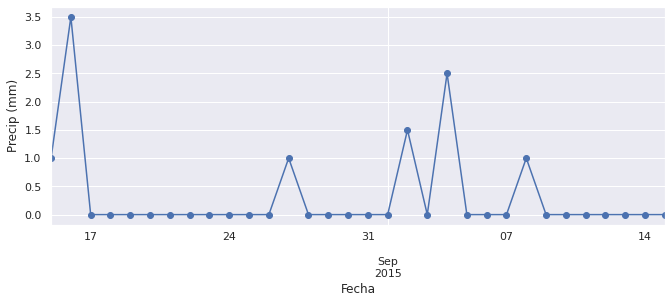

In [ ]:
# INVESTIGANDO UN PERIODO DE DATOS ( 2015 )
ax = df_90.loc['2015-08-15':'2015-09-15', 'Precipitacion'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

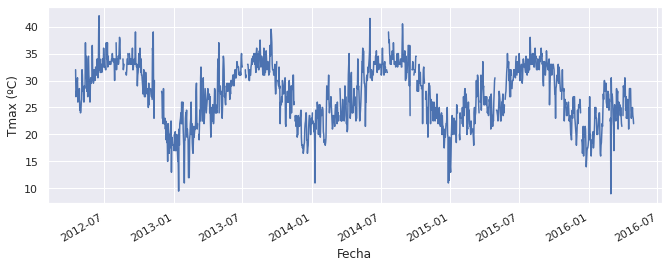

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS DE TMAX
ax = df_90.loc['2012':'2017', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');

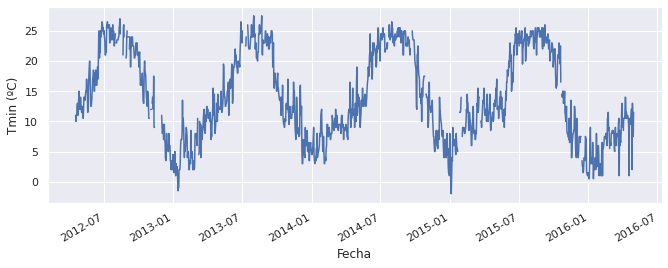

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS TMIN
ax = df_90.loc['2012':'2017', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');

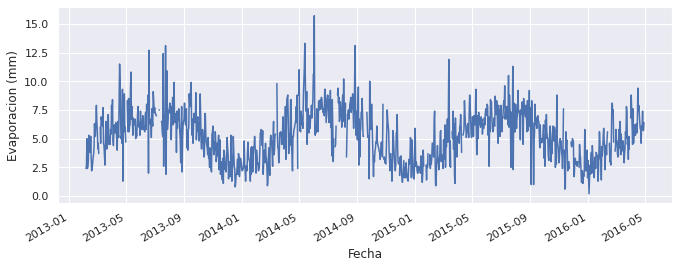

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS EVAPORACION
ax = df_90.loc['2012':'2017', 'Evaporacion'].plot()
ax.set_ylabel('Evaporacion (mm)');

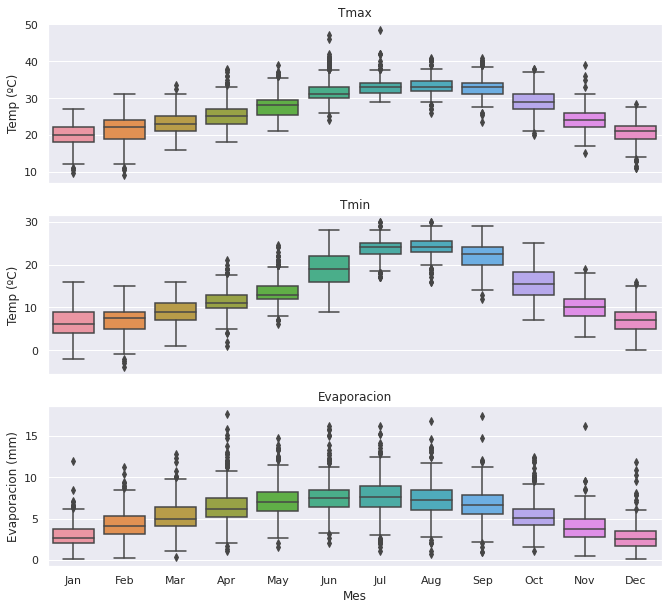

In [ ]:
#ANALIZANDO ESTACIONALIDAD

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evaporacion'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evaporacion':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evaporacion (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

In [ ]:
# SUAVIZANDO CURVA DE TMAX CON PROMEDIOS MOVILES (7,30, 365 DÍAS)
data_cols = ['Evaporacion', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True,min_periods=1).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True,min_periods=1).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True,min_periods=1).mean()

df_90_365d

,Evaporacion,Tmax,Tmin
Fecha,,,
1980-01-01,6.226415,26.448087,12.122951
1980-01-02,6.250000,26.505435,12.209239
1980-01-03,6.269565,26.567568,12.305405
1980-01-04,6.243827,26.596774,12.384409
1980-01-05,6.241718,26.625668,12.441176
...,...,...,...
2016-04-25,4.208475,23.345109,7.008152
2016-04-26,4.200000,23.297814,6.969945
2016-04-27,4.209714,23.269231,6.925824


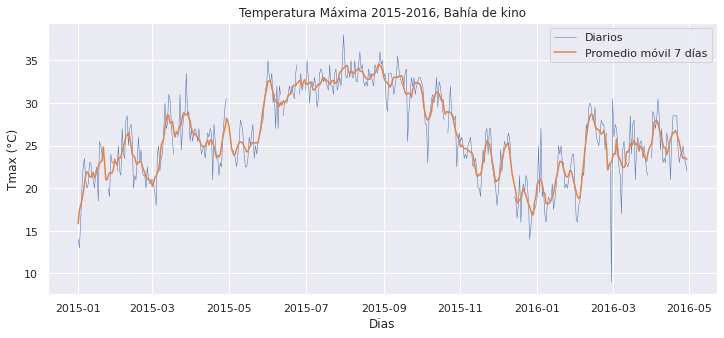

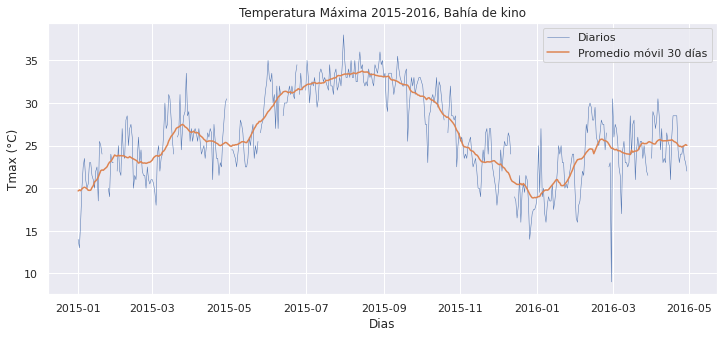

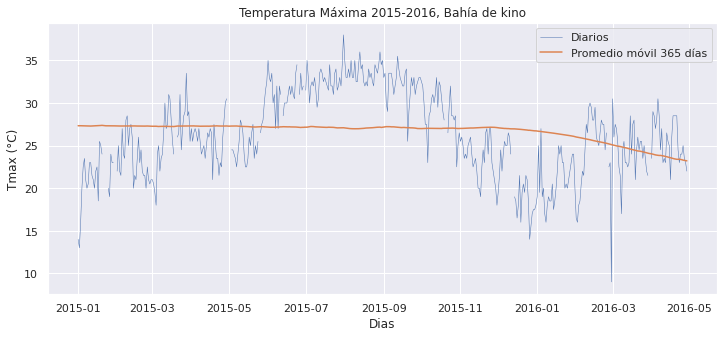

In [ ]:
#FECHA DE INICIO Y DE FIN
start, end = '2015-01', '2016-12'

# CONTRASTE DE LA GRAFICA DIARIO CON LA CURVA SUAVIZADA A 30 DÍAS
sns.set(rc={'figure.figsize':(12, 5)})

for name, ax ,d in zip([df_90_7d, df_90_30d,df_90_365d], axes, [7,30,365]):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, 'Tmax'], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(name.loc[start:end, 'Tmax'], linestyle='-', label=f'Promedio móvil {d} días')
 
  ax.set_xlabel('Dias')
  ax.set_ylabel('Tmax (°C)')
  ax.set_title('Temperatura Máxima 2015-2016, Bahía de kino')
  ax.legend();


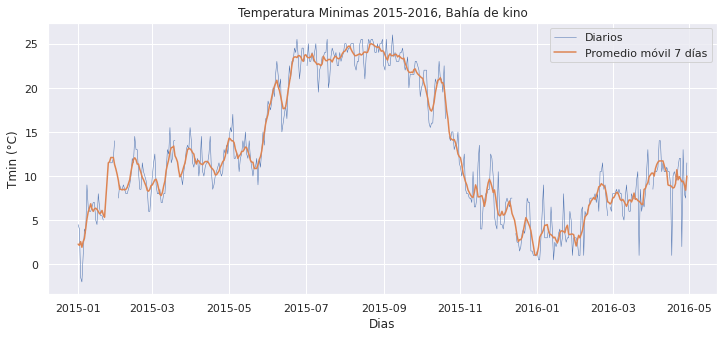

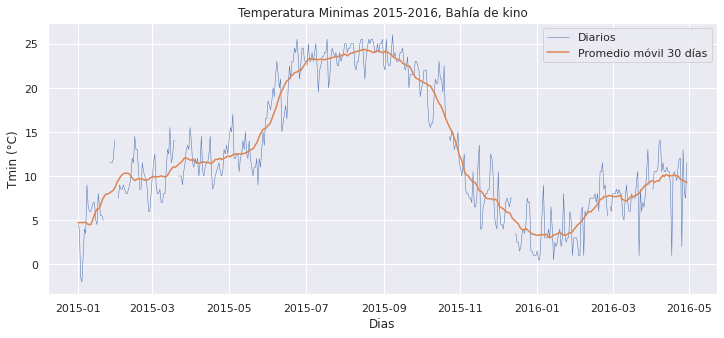

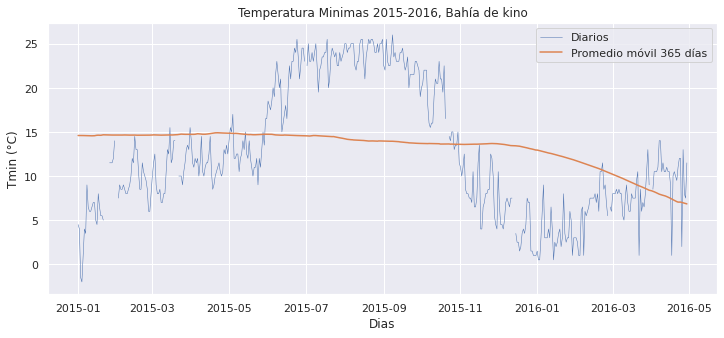

In [ ]:
#FECHA DE INICIO Y DE FIN
start, end = '2015-01', '2016-12'

# CONTRASTE DE LA GRAFICA DIARIO CON LA CURVA SUAVIZADA A 30 DÍAS
sns.set(rc={'figure.figsize':(12, 5)})

for name, ax ,d in zip([df_90_7d, df_90_30d,df_90_365d], axes, [7,30,365]):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, 'Tmin'], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(name.loc[start:end, 'Tmin'], linestyle='-', label=f'Promedio móvil {d} días')
 
  ax.set_xlabel('Dias')
  ax.set_ylabel('Tmin (°C)')
  ax.set_title('Temperatura Minimas 2015-2016, Bahía de kino')
  ax.legend();


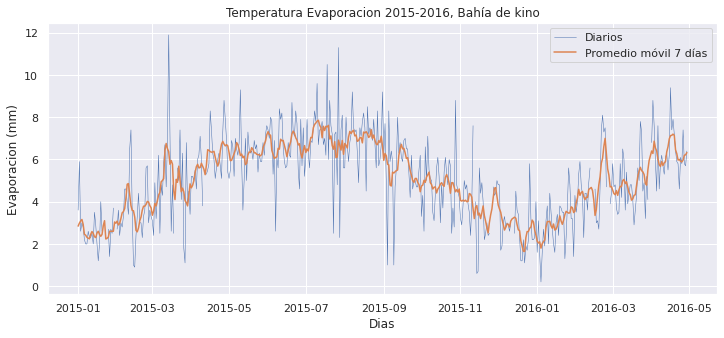

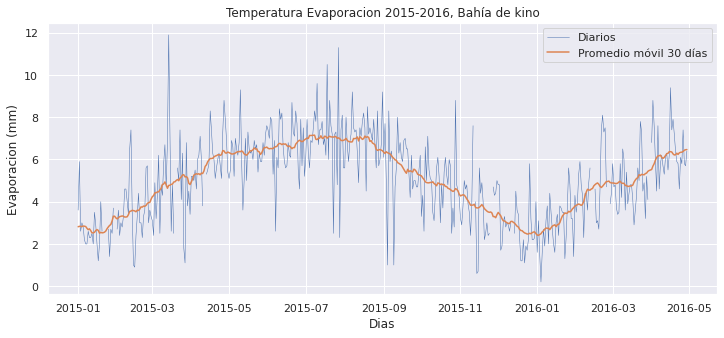

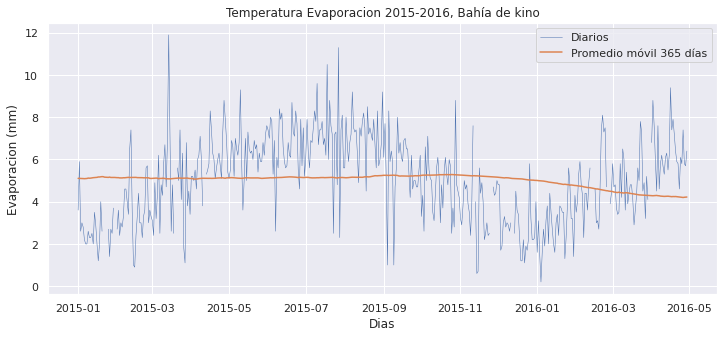

In [ ]:
#FECHA DE INICIO Y DE FIN
start, end = '2015-01', '2016-12'

# CONTRASTE DE LA GRAFICA DIARIO CON LA CURVA SUAVIZADA A 30 DÍAS
sns.set(rc={'figure.figsize':(12, 5)})

for name, ax ,d in zip([df_90_7d, df_90_30d,df_90_365d], axes, [7,30,365]):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, 'Evaporacion'], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(name.loc[start:end, 'Evaporacion'], linestyle='-', label=f'Promedio móvil {d} días')
 
  ax.set_xlabel('Dias')
  ax.set_ylabel('Evaporacion (mm)')
  ax.set_title('Temperatura Evaporacion 2015-2016, Bahía de kino')
  ax.legend();


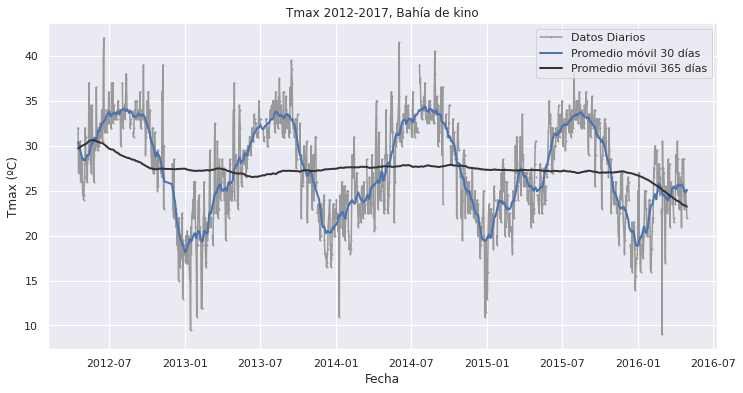

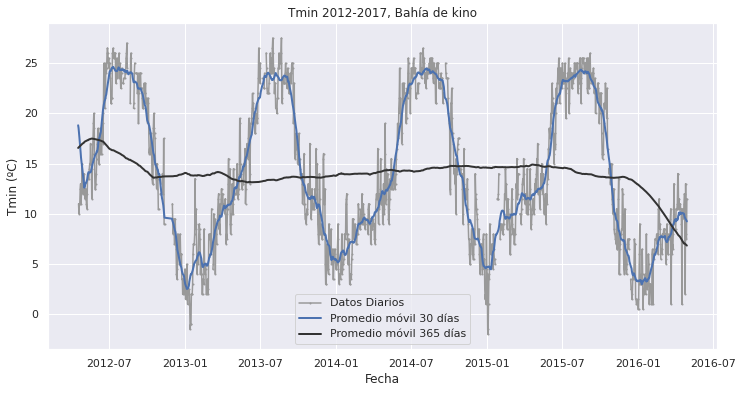

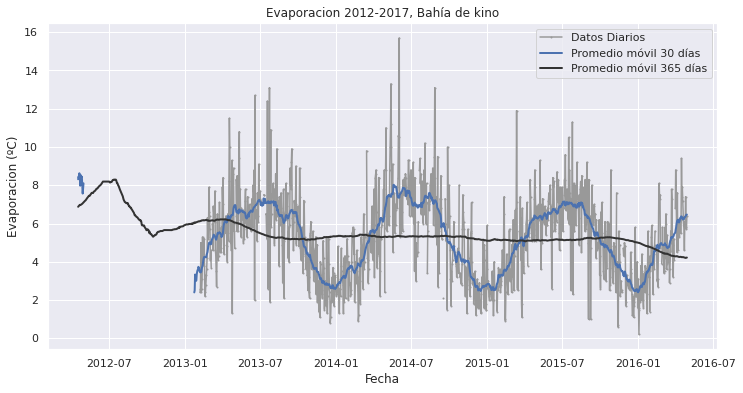

In [ ]:
#FECHA INICIO Y FINAL
start, end = '2012-01', '2017-12'

#CONTRASTE DE GRAFICAS SUAVISADAS DE 30 Y 365 DIAS
sns.set(rc={'figure.figsize':(12, 6)})

for name, ax in zip(["Tmax","Tmin","Evaporacion"], axes):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, name],
  marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
  ax.plot(df_90_30d.loc[start:end, name], linestyle='-', linewidth=2, label=f'Promedio móvil 30 días')
  ax.plot(df_90_365d.loc[start:end, name], linestyle='-', color='0.2', linewidth=2, label=f'Promedio móvil 365 días')

  ax.set_xlabel('Fecha')
  ax.set_ylabel(f'{name} (ºC)')
  ax.set_title(f'{name} 2012-2017, Bahía de kino')
  ax.legend();

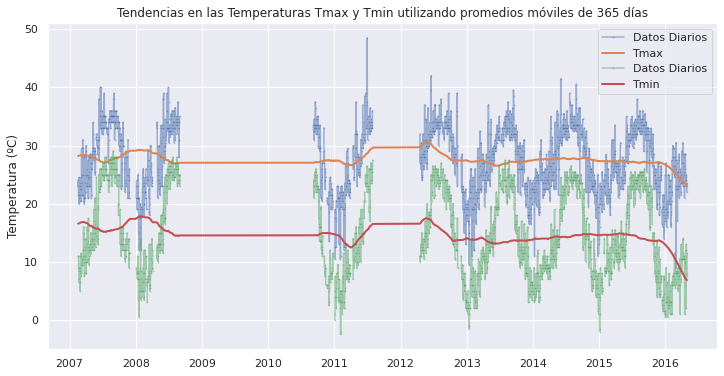

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
start, end = '2005-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');


# **ANALISIS DE TENDENCIA USANDO STATSMODEL PARA TMAX Y TMIN**

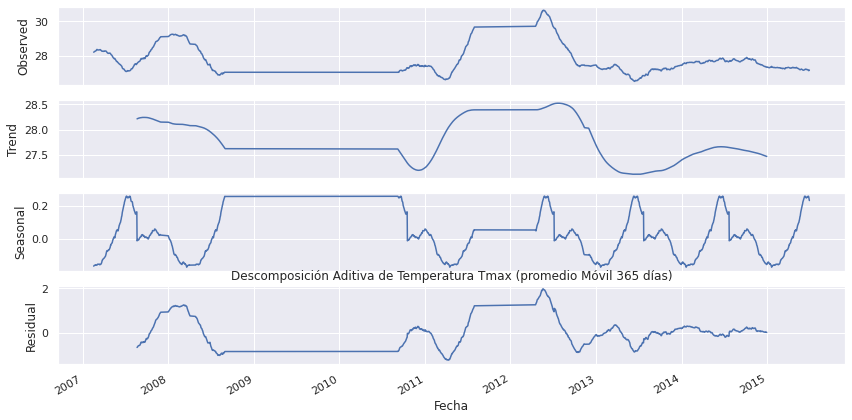

In [ ]:
# USO DEL MODELO STAST MODEL 365 DIAS PARA TMAX

sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2000-01', '2015-06'

decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()
plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

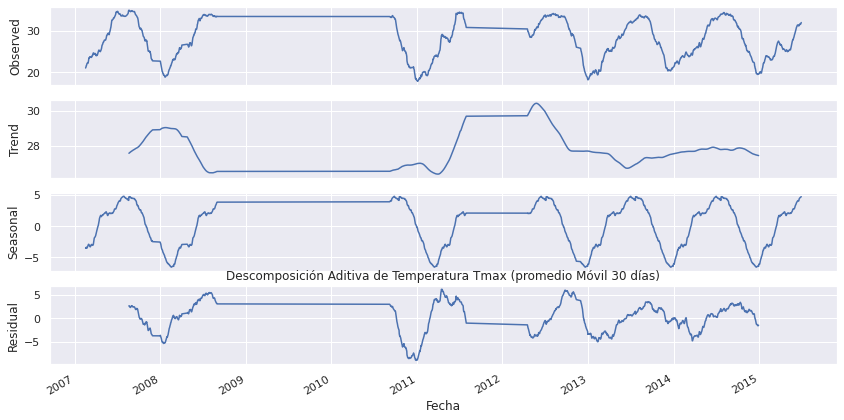

In [ ]:
# USO DEL MODELO STAST MODEL 30 DIAS PARA TMAX

sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2000-01', '2015-06'

decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()
plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

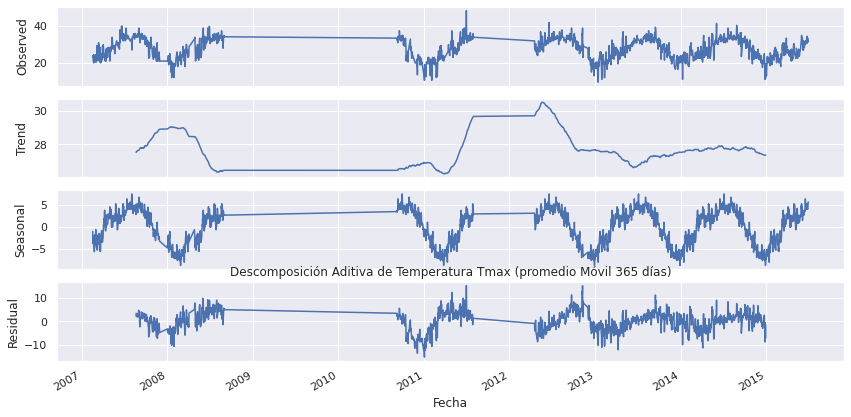

In [ ]:
# USO DEL MODELO STAST MODEL DIARIOS A DIAS PARA TMAX

sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2000-01', '2015-06'

decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()
plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

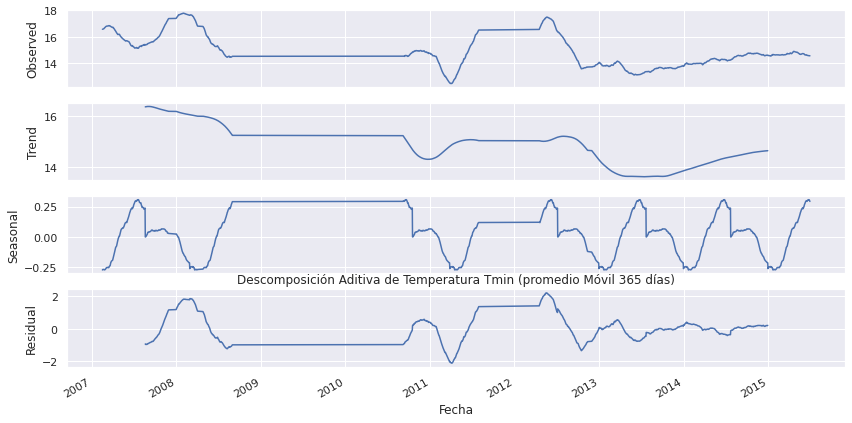

In [ ]:
# USO DEL MODELO STAST MODEL 365 DIAS PARA TMIN

sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2000-01', '2015-06'

decompfreq = 365
resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()
plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

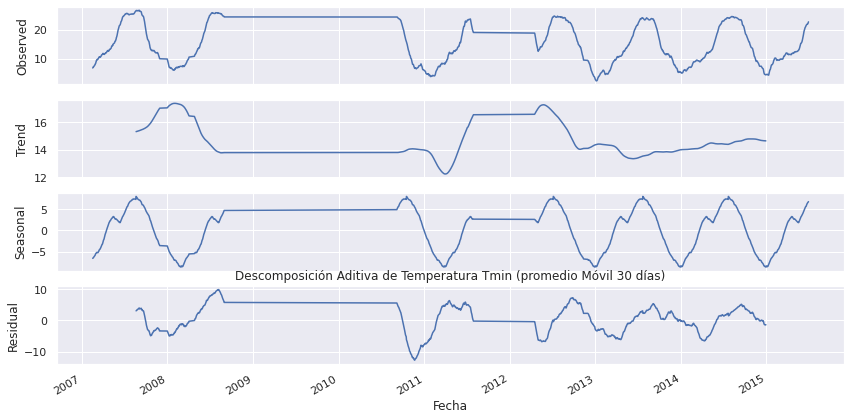

In [ ]:
# USO DEL MODELO STAST MODEL 30 DIAS PARA TMIN

sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2000-01', '2015-06'

decompfreq = 365
resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()
plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

In [ ]:
print("resTmax")
print()
print(resTmax.trend.describe())
print()
print("resTmin")
print()
print(resTmin.trend.describe())

resTmax

count    1621.000000
mean       27.702108
std         0.932710
min        26.268493
25%        27.017808
50%        27.626712
75%        27.900685
max        30.491781
Name: Tmax, dtype: float64

resTmin

count    1621.000000
mean       14.641830
std         1.205079
min        12.242208
25%        13.864446
50%        14.340394
75%        15.217500
max        17.381949
Name: Tmin, dtype: float64


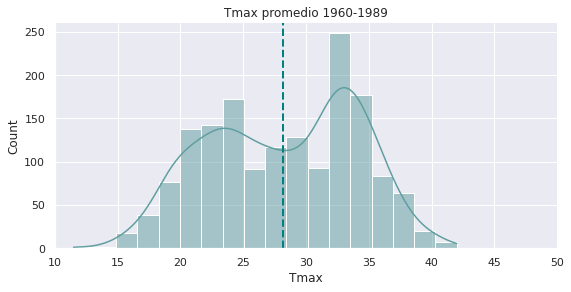

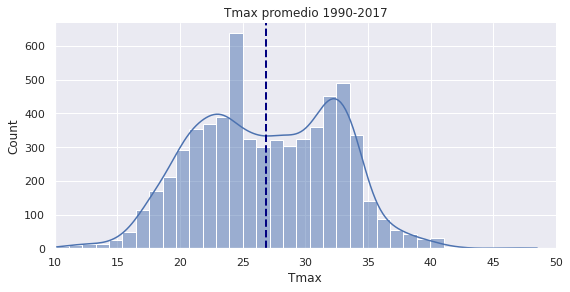

Tmax_promedio df_60 =  28.194135802469138 ºC
Tmax_promedio df_90 =  26.884829572731636 ºC


In [ ]:
# GRAFICA DE DISTRIBUCION DE TMAX

g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmax promedio 1960-1989');
g3.set(title='Tmax promedio 1990-2017');
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))

plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

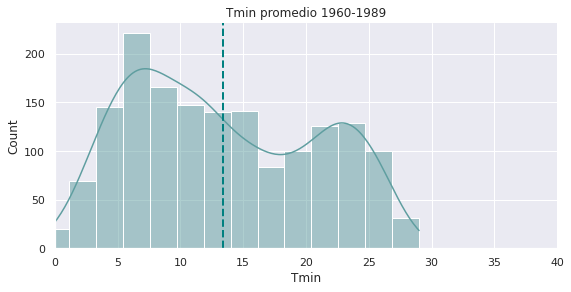

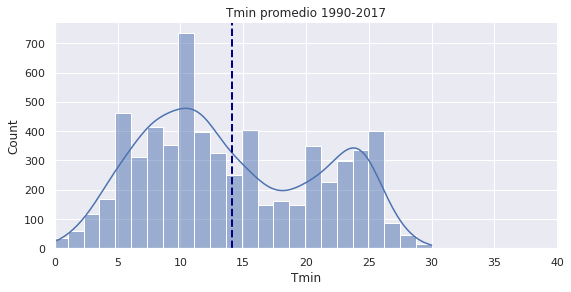

Tmin_promedio df_60 =  13.365781346510191 ºC
Tmin_promedio df_90 =  14.10469573550551 ºC
Tmin_sdev df_60 =  7.3839352352985035 ºC
Tmin_sdev df_90 =  6.997148231805299 ºC


In [ ]:
# GRAFICA DE DISTRIBUCION DE TMIN

g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmin promedio 1960-1989');
g3.set(title='Tmin promedio 1990-2017');
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))

plt.show();

print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )